# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **0.5p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **0.5p**

- Check for missing values and report the number and percentage of missing data for each column. **0.5p**

- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. **0.5p**

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. **0.5p**

- Identify outliers in at least one numerical column using boxplots. **0.5p**

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. **0.5p**

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. **0.5p**

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. **0.5p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **0.5p**

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis 

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age         workclass  fnlwgt     education  education-num  \
18940   65           Private  172906       HS-grad              9   
7585    19           Private  164395       HS-grad              9   
2442    54         Local-gov  137678  Some-college             10   
23103   48         Local-gov  144122       Masters             14   
6322    43  Self-emp-not-inc   64112  Some-college             10   
28317   38           Private  283293       HS-grad              9   
25271   36           Private  218490     Bachelors             13   
30601   24       Federal-gov  210736       HS-grad              9   
13646   62                 ?  129246       HS-grad              9   
14747   49           Private  149949       HS-grad              9   

           marital-status       occupation   relationship   race     sex  \
18940             Widowed     Adm-clerical      Unmarried  White  Female   
7585        Never-married     Adm-clerical      Own-child  White  Female   
2442             Divorced     Adm-clerical      Unmarried  White  Female   
23103            Divorced   Prof-specialty  Not-in-family  White  Female   
6322   Married-civ-spouse  Farming-fishing        Husband  White    Male   
28317  Married-civ-spouse     Craft-repair        Husband  Black    Male   
25271  Married-civ-spouse   Prof-specialty        Husband  White    Male   
30601       Never-married     Adm-clerical  Not-in-family  White  Female   
13646  Married-civ-spouse                ?        Husband  White    Male   
14747            Divorced     Craft-repair  Not-in-family  White    Male   

       capital-gain  capital-loss  hours-per-week native-country income  
18940             0             0              40  United-States  <=50K  
7585              0             0              25  United-States  <=50K  
2442              0             0              40  United-States  <=50K  
23103             0             0              40  United-States   >50K  
6322              0             0              50  United-States  <=50K  
28317             0             0              40  United-States  <=50K  
25271             0             0              45        Germany   >50K  
30601             0          1974              40  United-States  <=50K  
13646             0             0              40  United-States  <=50K  
14747             0          1876              40  United-States  <=50K

#### **1. Analizarea variabilei target "hours-per-week"**

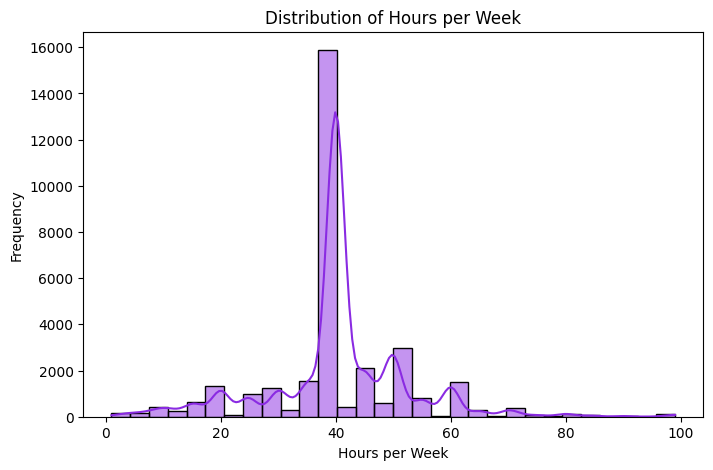

In [48]:
# Histogramă pentru distribuția variabilei 'hours-per-week'
plt.figure(figsize=(8,5))
sns.histplot(data['hours-per-week'], bins=30, kde=True, color='blueviolet')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.title('Distribution of Hours per Week')
plt.show()

**Graficul** arată o distribuție cu un vârf pronunțat în jur de patruzeci de ore pe săptămână, ceea ce indică faptul că majoritatea persoanelor lucrează această durată standard. Există și alte vârfuri mai mici, în special în jur de douăzeci și șaizeci de ore, ceea ce sugerează că există categorii distincte de muncitori, cum ar fi cei part-time și cei care lucrează ore suplimentare.  

**Distribuția** este asimetrică spre dreapta, având o coadă lungă care se întinde până la valori apropiate de o sută de ore. Acest lucru înseamnă că există un număr mic de persoane care lucrează un număr foarte mare de ore, ceea ce influențează media generală.  

**Outlierii** sunt vizibili în partea dreaptă a graficului, unde există câteva valori extreme peste optzeci de ore pe săptămână. Aceste valori ar putea reprezenta persoane care au mai multe locuri de muncă sau care lucrează în industrii ce necesită multe ore suplimentare.  

**Skewness-ul** este pozitiv, ceea ce înseamnă că majoritatea valorilor sunt concentrate în partea inferioară, iar distribuția este împinsă spre dreapta de un număr mic de persoane care muncesc mult mai mult decât restul. Această asimetrie indică faptul că media orelor de muncă este mai mare decât mediana, iar analiza trebuie să țină cont de acest dezechilibru în date.

#### **2. Statistici descriptive**

In [49]:
data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

Tabelul oferă o imagine de ansamblu asupra datasetului, incluzând media, mediana și deviația standard pentru fiecare variabilă numerică.  

Variabila hours-per-week are o **medie** de aproximativ patruzeci de ore, ceea ce reprezintă valoarea aritmetică obținută prin împărțirea sumei tuturor orelor la numărul total de persoane. **Mediana** este tot patruzeci, ceea ce înseamnă că jumătate dintre persoane muncesc mai puțin de patruzeci de ore, iar cealaltă jumătate mai mult. **Deviația standard** este de doisprezece, indicând cât de mult variază numărul de ore față de medie. O deviație mare sugerează diferențe semnificative între angajați în ceea ce privește timpul de lucru. Există și valori extreme, cum ar fi un maxim de nouăzeci și nouă de ore, ceea ce poate indica outlieri.  

Vârsta medie este de treizeci și opt de ani, iar majoritatea angajaților au între douăzeci și opt și patruzeci și opt de ani. Nivelul de educație sugerează că cei mai mulți au absolvit liceul sau au urmat studii universitare.  

Variabilele capital-gain și capital-loss prezintă valori extreme, cu un maxim foarte ridicat, ceea ce ar putea necesita o analiză mai detaliată. În general, datele arată o distribuție clară a muncii, vârstei și educației, dar unele valori neobișnuite pot influența interpretarea.

In [15]:
# Calculul statisticilor specifice pentru variabila 'hours-per-week'
summary_stats = data['hours-per-week'].describe()
print("Statistici descriptive pentru hours-per-week")
print(summary_stats)

Statistici descriptive pentru hours-per-week
count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


Tabelul arată că majoritatea angajaților lucrează în jur de patruzeci de ore pe săptămână, având atât media, cât și mediana la această valoare. Deviația standard de doisprezece indică o variație semnificativă între angajați.  

Percentilele arată că un sfert dintre persoane lucrează sub patruzeci de ore, iar trei sferturi sub patruzeci și cinci de ore. Minimul de o oră și maximul de nouăzeci și nouă sugerează prezența unor valori extreme, posibil outlieri.  

În concluzie, distribuția este concentrată în jur de patruzeci de ore, dar există variații mari care merită analizate suplimentar.

#### **3. Missing values**

In [31]:
data.head(20)

age         workclass  fnlwgt     education  education-num  \
0    39         State-gov   77516     Bachelors             13   
1    50  Self-emp-not-inc   83311     Bachelors             13   
2    38           Private  215646       HS-grad              9   
3    53           Private  234721          11th              7   
4    28           Private  338409     Bachelors             13   
5    37           Private  284582       Masters             14   
6    49           Private  160187           9th              5   
7    52  Self-emp-not-inc  209642       HS-grad              9   
8    31           Private   45781       Masters             14   
9    42           Private  159449     Bachelors             13   
10   37           Private  280464  Some-college             10   
11   30         State-gov  141297     Bachelors             13   
12   23           Private  122272     Bachelors             13   
13   32           Private  205019    Assoc-acdm             12   
14   40           Private  121772     Assoc-voc             11   
15   34           Private  245487       7th-8th              4   
16   25  Self-emp-not-inc  176756       HS-grad              9   
17   32           Private  186824       HS-grad              9   
18   38           Private   28887          11th              7   
19   43  Self-emp-not-inc  292175       Masters             14   

           marital-status         occupation   relationship  \
0           Never-married       Adm-clerical  Not-in-family   
1      Married-civ-spouse    Exec-managerial        Husband   
2                Divorced  Handlers-cleaners  Not-in-family   
3      Married-civ-spouse  Handlers-cleaners        Husband   
4      Married-civ-spouse     Prof-specialty           Wife   
5      Married-civ-spouse    Exec-managerial           Wife   
6   Married-spouse-absent      Other-service  Not-in-family   
7      Married-civ-spouse    Exec-managerial        Husband   
8           Never-married     Prof-specialty  Not-in-family   
9      Married-civ-spouse    Exec-managerial        Husband   
10     Married-civ-spouse    Exec-managerial        Husband   
11     Married-civ-spouse     Prof-specialty        Husband   
12          Never-married       Adm-clerical      Own-child   
13          Never-married              Sales  Not-in-family   
14     Married-civ-spouse       Craft-repair        Husband   
15     Married-civ-spouse   Transport-moving        Husband   
16          Never-married    Farming-fishing      Own-child   
17          Never-married  Machine-op-inspct      Unmarried   
18     Married-civ-spouse              Sales        Husband   
19               Divorced    Exec-managerial      Unmarried   

                  race     sex  capital-gain  capital-loss  hours-per-week  \
0                White    Male          2174             0              40   
1                White    Male             0             0              13   
2                White    Male             0             0              40   
3                Black    Male             0             0              40   
4                Black  Female             0             0              40   
5                White  Female             0             0              40   
6                Black  Female             0             0              16   
7                White    Male             0             0              45   
8                White  Female         14084             0              50   
9                White    Male          5178             0              40   
10               Black    Male             0             0              80   
11  Asian-Pac-Islander    Male             0             0              40   
12               White  Female             0             0              30   
13               Black    Male             0             0              50   
14  Asian-Pac-Islander    Male             0             0              40   
15  Amer-Indian-Eskimo    Male             0 

Observăm că în dataset există multe missing values reprezentate de "?". Verificăm cate valori "?" există în dataset și le vom transforma pe toate în non-valori. 

In [39]:
print((data == "?").sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [38]:
# Înlocuim toate valorile "?" cu NaN
data.replace("?", np.nan, inplace=True)

missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data))* 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

print(missing_data)


                Missing Values  Percentage (%)
age                          0        0.000000
workclass                 1836        5.638647
fnlwgt                       0        0.000000
education                    0        0.000000
education-num                0        0.000000
marital-status               0        0.000000
occupation                1843        5.660146
relationship                 0        0.000000
race                         0        0.000000
sex                          0        0.000000
capital-gain                 0        0.000000
capital-loss                 0        0.000000
hours-per-week               0        0.000000
native-country             583        1.790486
income                       0        0.000000


Rezultatele arată că trei coloane conțin valori lipsă: workclass, occupation și native-country. Restul coloanelor nu au date lipsă.

#### **4. Histograme pentru trei variabile numerice**

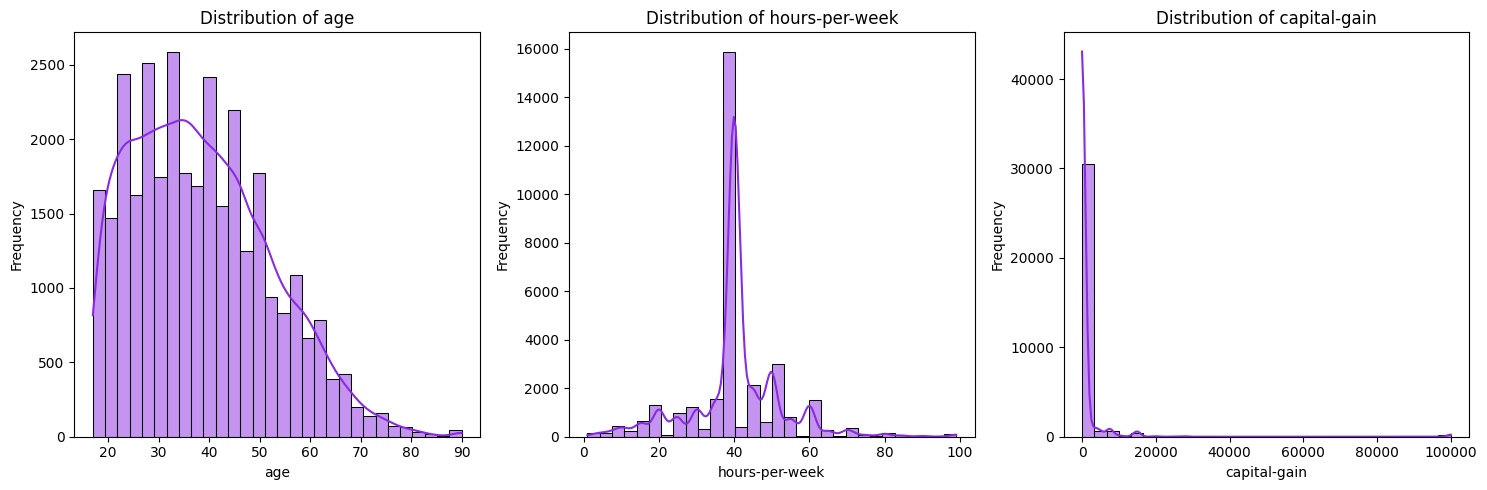

In [47]:
numerical_columns = ['age', 'hours-per-week', 'capital-gain']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)  # Creăm subploturi pentru cele trei grafice
    sns.histplot(data[col], bins=30, kde=True, color='blueviolet')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


1. Distribuția variabilei „age”
Skewness: Distribuția este right-skewed (asimetrie pozitivă), deoarece coada din dreapta este mai lungă. Aceasta indică faptul că majoritatea persoanelor sunt tinere sau de vârstă medie, dar există și câteva persoane mai în vârstă.
Modality: Distribuția este unimodală, având un singur vârf în jur de 30-40 de ani.
Majoritatea populației din dataset are între 20 și 50 de ani, iar numărul persoanelor mai în vârstă scade treptat.

2. Distribuția variabilei „hours-per-week”
Skewness: Distribuția este slightly right-skewed, având o coadă lungă în partea dreaptă. Majoritatea oamenilor lucrează în jur de 40 de ore, dar există și persoane care lucrează mai mult de 60-80 de ore.
Modality: Distribuția este unimodală, cu un vârf puternic în jurul valorii de 40 de ore, dar există și mici variații care sugerează posibile grupuri secundare.
Majoritatea persoanelor lucrează norma standard de 40 de ore, însă există și excepții, cum ar fi cei care lucrează part-time sau mult peste media normală.

3. Distribuția variabilei „capital-gain”
Skewness: Distribuția este puternic right-skewed, având o coadă lungă în dreapta. Majoritatea persoanelor au un capital-gain aproape de zero, dar câteva au valori extreme de peste 20.000-50.000.
Modality: Distribuția este unimodală, însă majoritatea valorilor sunt concentrate aproape de zero, cu foarte puține cazuri care au capital-gain mare.
Marea majoritate a populației nu raportează câștiguri de capital, iar doar un număr mic de persoane are valori foarte mari. Acest lucru sugerează un dezechilibru în această variabilă, ceea ce poate influența analizele ulterioare.

Variabilele age și hours-per-week au distribuții unimodale, dar cu o ușoară asimetrie spre dreapta.
Capital-gain este puternic skewed, cu o distribuție foarte inegală.


#### **5. Barplots pentru trei variabile categoriale**

C:\Users\Madalina\AppData\Local\Temp\ipykernel_5492\2924093740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="viridis", order=data[col].value_counts().index)
C:\Users\Madalina\AppData\Local\Temp\ipykernel_5492\2924093740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="viridis", order=data[col].value_counts().index)
C:\Users\Madalina\AppData\Local\Temp\ipykernel_5492\2924093740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="viridis", order=dat

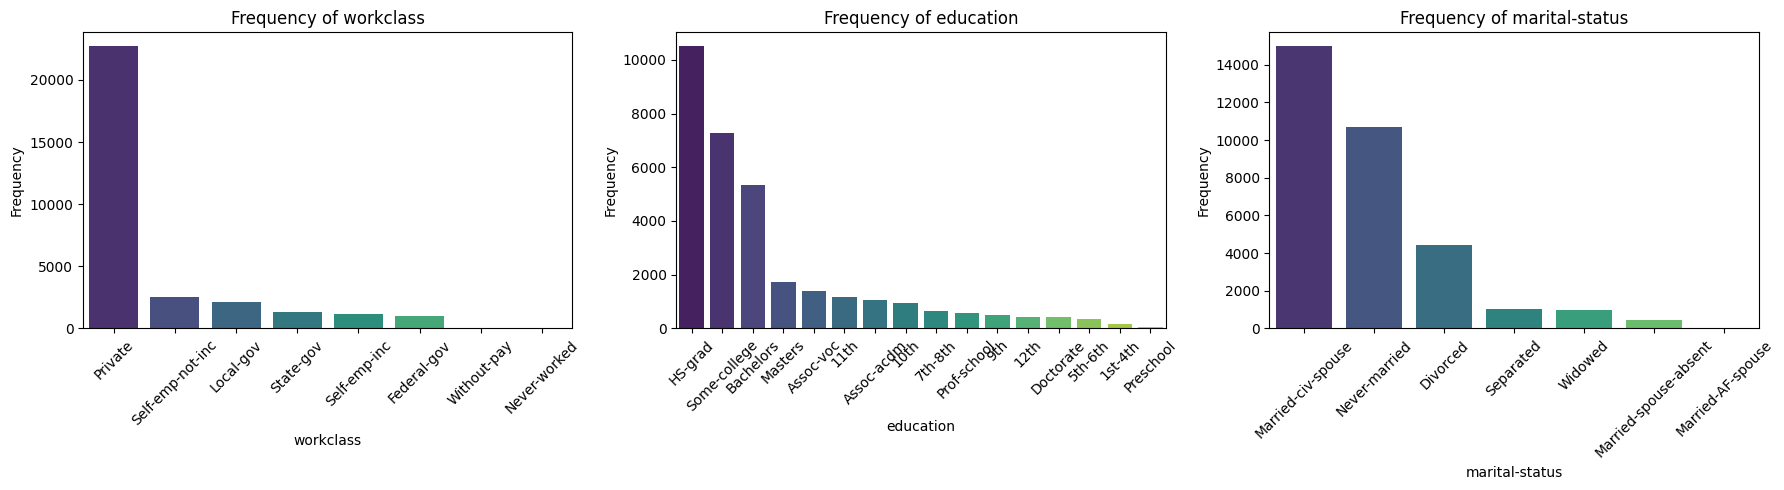

In [51]:
categorical_columns = ['workclass', 'education', 'marital-status']
plt.figure(figsize=(18, 5))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i) 
    sns.countplot(data=data, x=col, palette="viridis", order=data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Frequency of {col}")
plt.tight_layout()
plt.show()


Majoritatea persoanelor sunt angajate în sectorul privat, acesta având cea mai mare frecvență. Celelalte categorii, precum angajații pe cont propriu, cei care lucrează pentru guvernul local sau guvernul de stat, sunt mult mai puțin frecvente. Categoriile fără plată sau cei care nu au lucrat niciodată sunt aproape inexistente, ceea ce indică o populație activă din punct de vedere profesional.

În ceea ce privește educația, cei mai mulți au absolvit liceul, urmați de cei care au urmat câteva cursuri universitare și cei care au obținut o diplomă de licență. Educația avansată, cum ar fi studii de master sau doctorat, este mult mai puțin frecventă. De asemenea, există foarte puține persoane cu un nivel educațional foarte scăzut, cum ar fi cei care au terminat doar câteva clase primare.  

În ceea ce privește starea civilă, majoritatea persoanelor sunt căsătorite, ceea ce sugerează că datasetul conține în mare parte persoane care trăiesc într-un cadru familial stabil. A doua cea mai frecventă categorie este cea a persoanelor care nu s-au căsătorit niciodată, urmată de persoanele divorțate. Categoriile mai puțin frecvente includ persoanele separate, văduve și cele al căror partener este absent.  

În concluzie, cele mai multe persoane din dataset lucrează în sectorul privat, au un nivel de educație mediu și sunt căsătorite. Există un număr semnificativ de persoane necăsătorite și cu un nivel de educație mai scăzut. Distribuțiile acestor variabile sunt dezechilibrate, cu unele categorii dominante, ceea ce poate influența interpretarea datelor și modelele predictive.

#### **6. Outlieri într-o variabilă numerică – analiză cu boxplot**

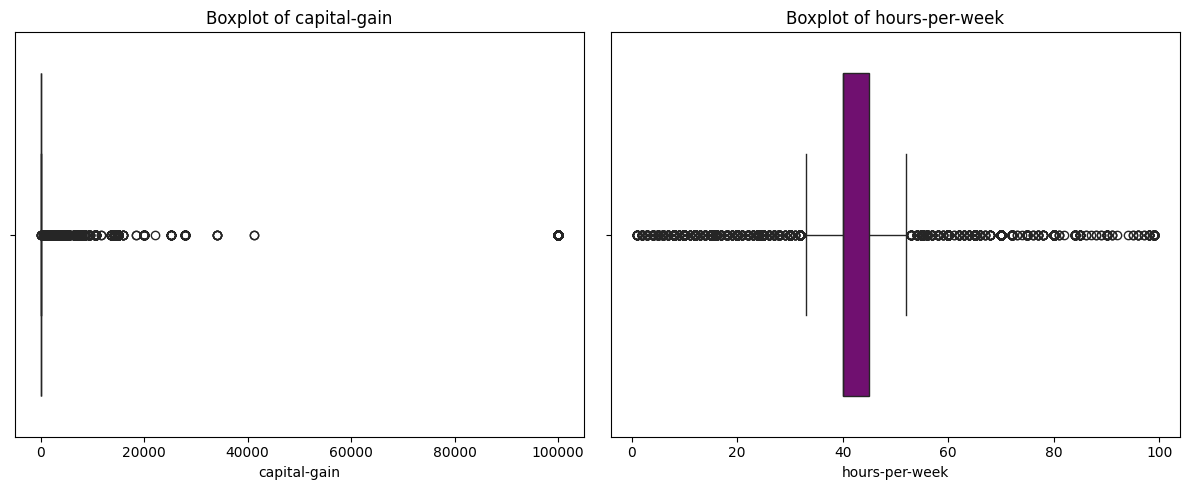

In [52]:
numerical_columns = ['capital-gain', 'hours-per-week']
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=data[col], color="purple")
    plt.xlabel(col)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

Boxplot-ul pentru capital-gain arată un număr mare de outlieri, majoritatea valorilor fiind aproape de zero, cu câteva cazuri extreme peste 50.000. Distribuția este puternic skewed spre dreapta, ceea ce sugerează că doar puține persoane au câștiguri mari de capital.

Boxplot-ul pentru hours-per-week indică că majoritatea persoanelor lucrează în jur de 40 de ore, dar există outlieri atât la valori mici, cât și la cele foarte mari, unele ajungând la 99 de ore pe săptămână. Distribuția este ușor asimetrică spre dreapta, cu câteva cazuri extreme.

#### **7. Crearea unei matrice de corelație pentru hours-per-week și variabilele numerice**


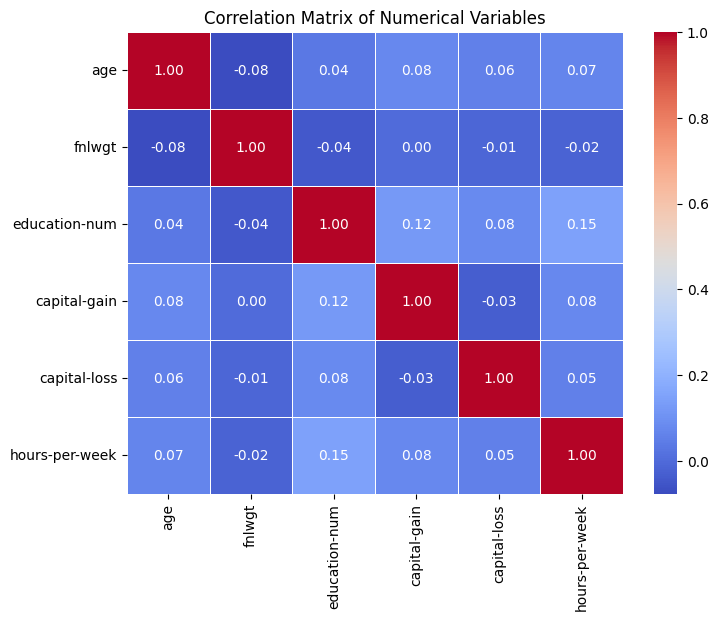

hours-per-week    1.000000
education-num     0.148123
capital-gain      0.078409
age               0.068756
capital-loss      0.054256
fnlwgt           -0.018768
Name: hours-per-week, dtype: float64


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selectăm doar variabilele numerice
numerical_columns = data.select_dtypes(include=['number'])

# Calculăm matricea de corelație
correlation_matrix = numerical_columns.corr()

# Extragem corelațiile față de 'hours-per-week'
correlation_with_target = correlation_matrix['hours-per-week'].sort_values(ascending=False)

# Afișăm matricea de corelație sub formă de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

# Afișăm corelațiile ordonate cu target-ul
print(correlation_with_target)


Cele mai puternice corelații cu hours-per-week:
**education-num** (0.15) → cea mai mare corelație pozitivă, dar destul de slabă. Acest lucru sugerează că persoanele cu mai mulți ani de educație tind să lucreze mai multe ore, dar relația nu este foarte puternică.
capital-gain (0.08) și age (0.07) → corelații slabe pozitive, ceea ce înseamnă că vârsta mai mare și câștigurile de capital sunt asociate ușor cu un număr mai mare de ore de muncă, dar nu suficient de semnificativ.
Cele mai slabe corelații cu hours-per-week
fnlwgt (-0.02) → practic nu există corelație între greutatea finală a eșantionului și numărul de ore lucrate.
capital-loss (0.05) → corelație foarte slabă, ceea ce înseamnă că pierderile de capital nu influențează semnificativ orele de muncă.

Concluzii:
Nu există corelații puternice între hours-per-week și alte variabile numerice.
Education-num este singura variabilă care are o influență ușor mai mare asupra numărului de ore lucrate, dar este totuși o corelație slabă.
Variabilele fnlwgt, capital-gain și capital-loss nu au o influență semnificativă asupra orelor de muncă.

#### **8. Analiza relației dintre hours-per-week și education-num folosind scatter plot**

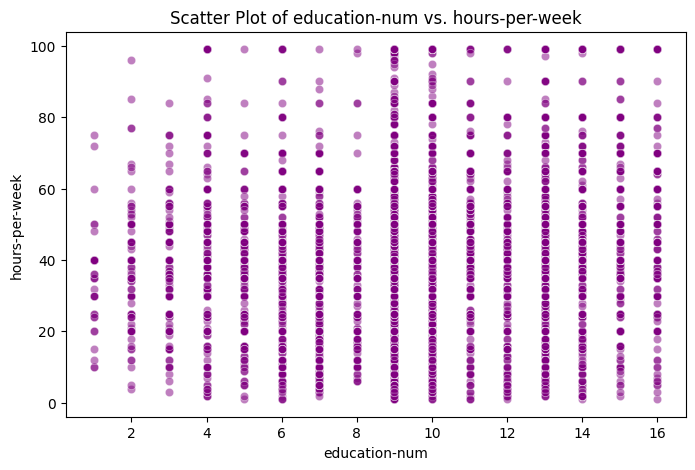

In [56]:
# Selectăm variabila numerică cu cea mai mare corelație cu hours-per-week
selected_variable = "education-num"

# Creăm scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data[selected_variable], y=data["hours-per-week"], alpha=0.5, color="purple")

# Adăugăm titlu și etichete
plt.xlabel(selected_variable)
plt.ylabel("hours-per-week")
plt.title(f"Scatter Plot of {selected_variable} vs. hours-per-week")

plt.show()


Acest grafic explorează relația dintre numărul de ani de educație și numărul de ore lucrate pe săptămână.

* Distribuția punctelor – Valorile sunt dispersate vertical pentru fiecare nivel de educație, ceea ce înseamnă că numărul de ore lucrate variază semnificativ chiar și pentru persoane cu același nivel de educație.
* Tendință generală – Există o ușoară tendință pozitivă, indicând că persoanele cu mai mulți ani de educație tind să lucreze ceva mai multe ore, dar relația nu este foarte clară.
* Grupare puternică la 40 de ore** – Majoritatea punctelor sunt concentrate în jurul valorii de 40 de ore pe săptămână, ceea ce sugerează că mulți oameni lucrează norma standard de muncă, indiferent de nivelul de educație.
* Outlieri – Există persoane care lucrează mai puțin de 10 ore sau peste 80 de ore pe săptămână, dar acestea sunt cazuri izolate.

Concluzie:
Deși există o corelație slabă pozitivă între education-num și hours-per-week, distribuția datelor sugerează că nivelul de educație nu este un predictor foarte puternic pentru numărul de ore lucrate.
Gruparea puternică în jurul a 40 de ore arată că mulți angajați respectă norma standard de muncă.
Outlierii din partea superioară și inferioară ar trebui analizați separat pentru a înțelege dacă reprezintă anomalii sau categorii specifice de angajați.

#### 9. **Analiza relației dintre hours-per-week și variabilele categorice folosind violin plots**

C:\Users\Madalina\AppData\Local\Temp\ipykernel_5492\565366805.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[col], y=data["hours-per-week"], palette="coolwarm")
C:\Users\Madalina\AppData\Local\Temp\ipykernel_5492\565366805.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[col], y=data["hours-per-week"], palette="coolwarm")
C:\Users\Madalina\AppData\Local\Temp\ipykernel_5492\565366805.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[col], y=data["hours-per-week"], palette="coolwarm")
C:\Users\Madalin

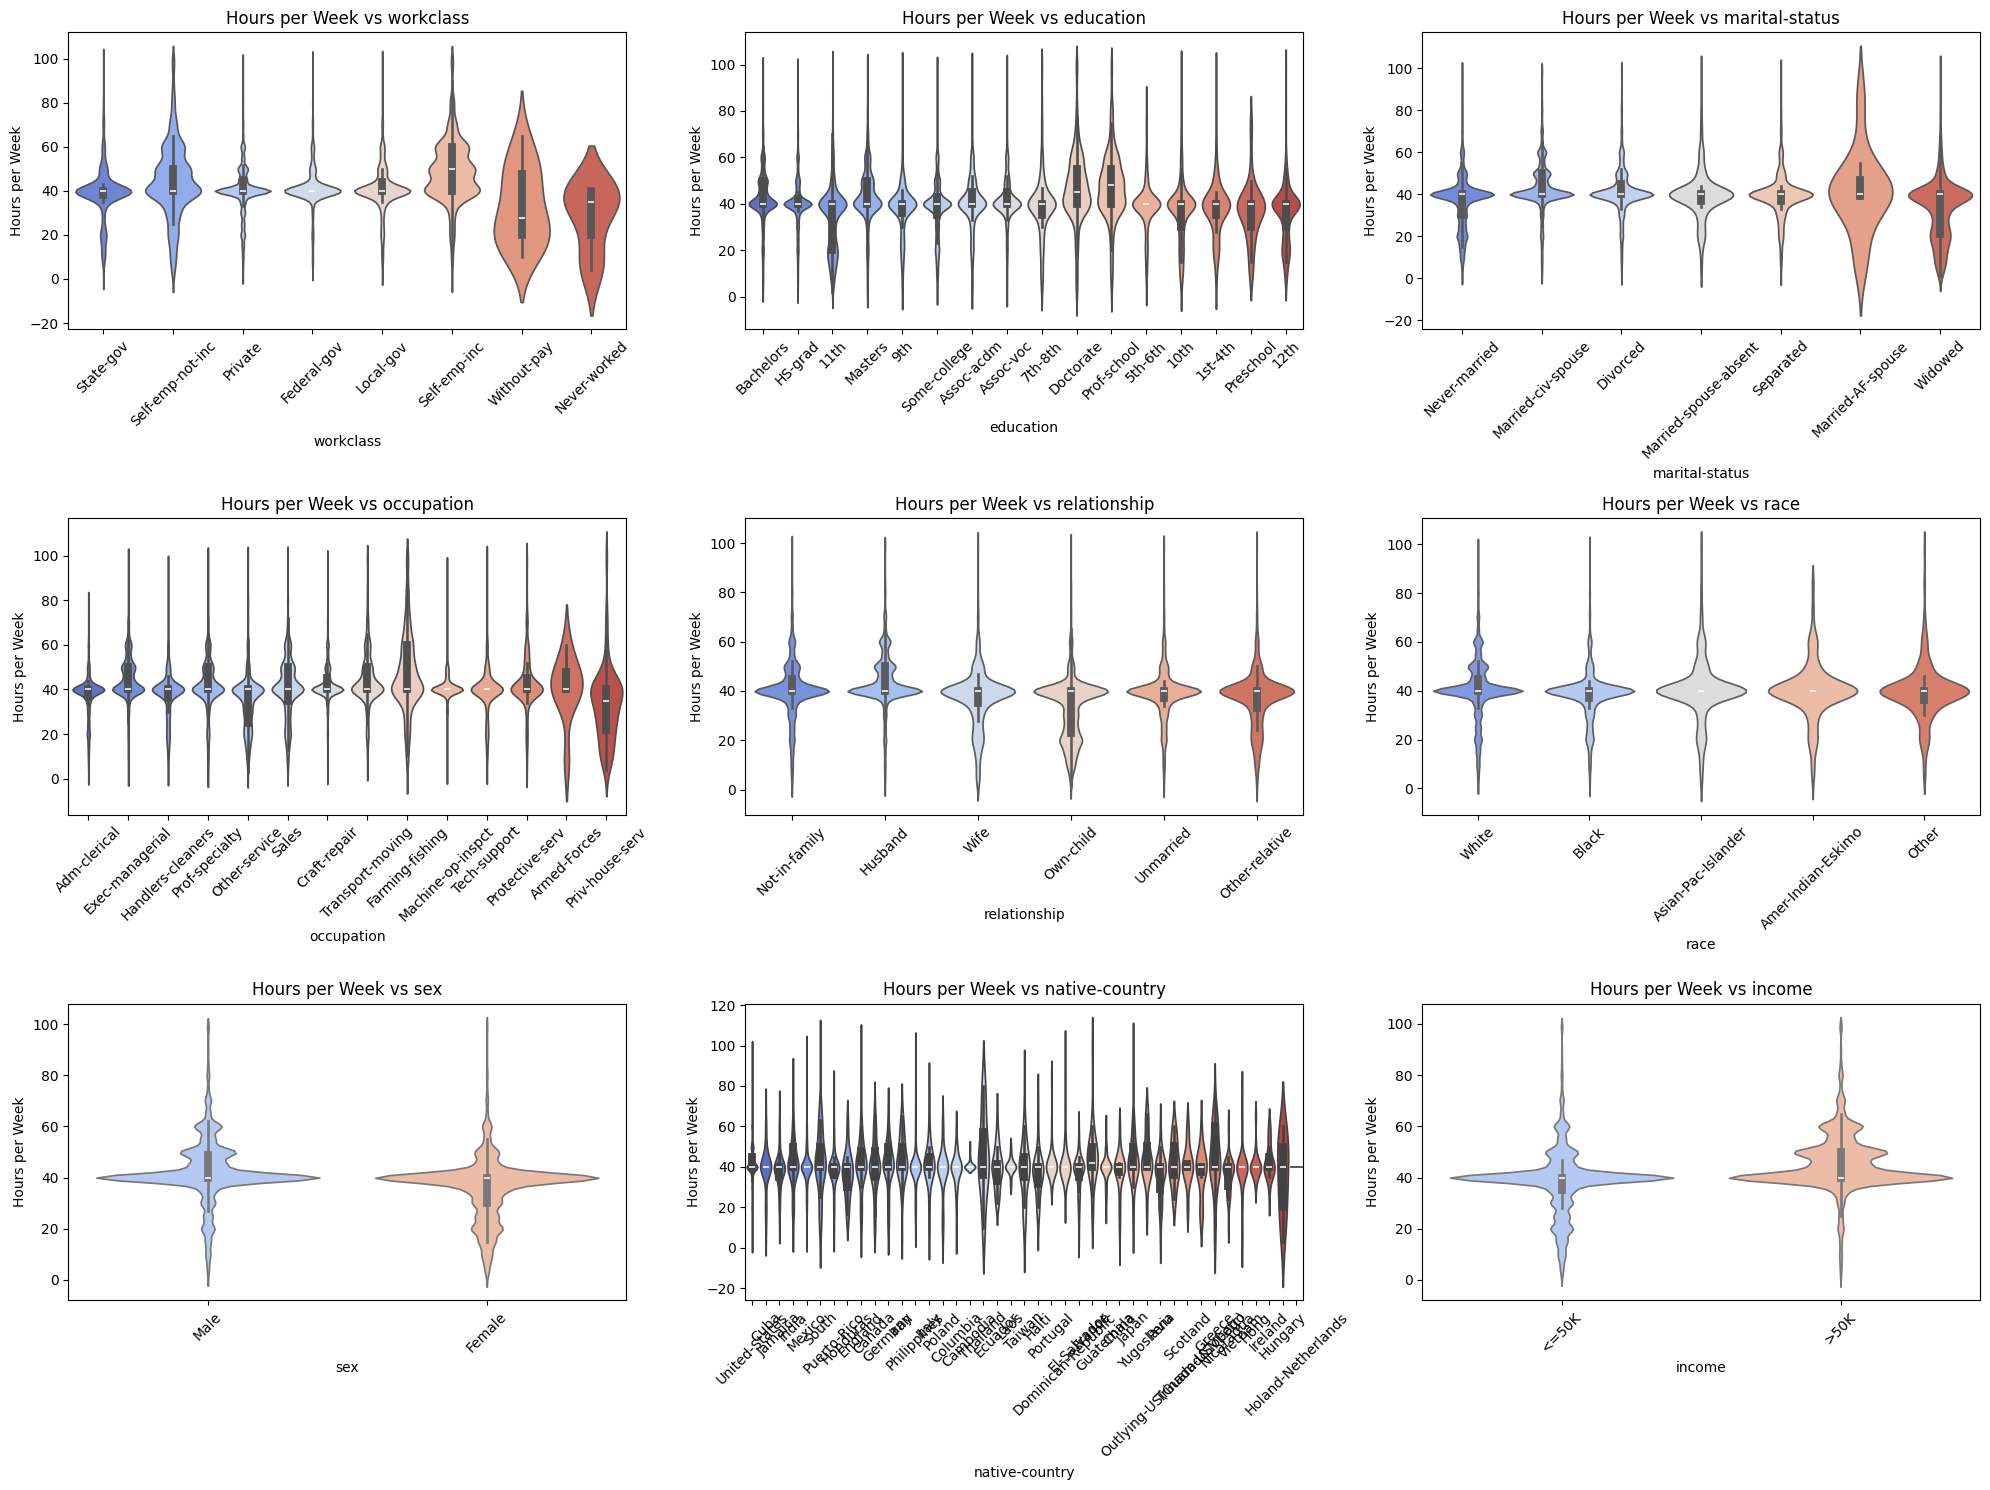

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista tuturor variabilelor categorice din dataset
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex', 'native-country', 'income']

# Setăm dimensiunea figurii
plt.figure(figsize=(20, 15))

# Creăm câte un violin plot pentru fiecare variabilă categorică
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # Aranjăm graficul în 3x3 subploturi
    sns.violinplot(x=data[col], y=data["hours-per-week"], palette="coolwarm")
    plt.xticks(rotation=45)  # Rotim etichetele pentru lizibilitate
    plt.xlabel(col)
    plt.ylabel("Hours per Week")
    plt.title(f"Hours per Week vs {col}")

plt.tight_layout()
plt.show()


1. Relația dintre workclass și orele lucrate arată că sectorul privat are o distribuție stabilă în jur de 40 de ore, în timp ce self-employed și without-pay prezintă variații mari, unele persoane lucrând foarte puțin, iar altele extrem de mult.

2. În funcție de educație, distribuția orelor lucrate este similară pentru toate categoriile, dar cei cu **Doctorate** și **Master’s** tind să aibă o ușoară creștere a numărului de ore lucrate. Outlierii sugerează că există persoane care lucrează extrem de puțin sau foarte mult, indiferent de nivelul educației.

3. Pentru statutul marital, persoanele căsătorite au un program mai stabil în jur de 40 de ore, în timp ce never-married și divorced prezintă mai multe variații. Cea mai mare dispersie apare la married-AF-spouse, unde unele persoane lucrează extrem de puține sau foarte multe ore.

4. Relația dintre ocupație și orele lucrate arată că majoritatea domeniilor sunt centrate în jur de 40 de ore pe săptămână, dar joburi precum **transport-moving, armed-forces și protective-serv** au variații mari, indicând programe mai neregulate.  

5. Pentru relația dintre orele lucrate și statutul familial, persoanele căsătorite tind să lucreze mai constant, în timp ce **own-child și unmarried** prezintă mai multă variație, semnalând un program mai flexibil.  

6. Analiza pe rasă nu indică diferențe semnificative, toate grupurile având distribuții similare, cu o ușoară variație pentru **Asian-Pac-Islander**, care pare să aibă o dispersie mai mare a numărului de ore lucrate.
Relația dintre sex și orele lucrate arată că **bărbații și femeile** au distribuții similare, majoritatea lucrând în jur de 40 de ore pe săptămână, dar bărbații au o ușoară tendință de a lucra mai multe ore.  

7. Relația dintre sex și orele lucrate arată că bărbații și femeile au distribuții similare, majoritatea lucrând în jur de 40 de ore pe săptămână, dar bărbații au o ușoară tendință de a lucra mai multe ore.

8. Pentru țara de origine, distribuția este **destul de variabilă**, dar majoritatea categoriilor sunt centrate în jur de 40 de ore. Unele țări prezintă dispersii mai mari, ceea ce sugerează diferențe în tipurile de locuri de muncă și regimul de muncă.  

9. În funcție de venit, persoanele care câștigă **peste 50K** tind să lucreze **puțin mai multe ore** decât cele cu un venit mai mic, dar distribuția este similară, cu o concentrare puternică în jurul a 40 de ore pentru ambele grupuri.

#### **10. Summary report**

**Key Patterns and Trends**
* Majoritatea persoanelor lucrează în jur de 40 de ore pe săptămână, indiferent de categoria analizată.
* Educația are o influență slabă asupra orelor lucrate, dar persoanele cu studii superioare tind să aibă mai multe variații în programul de muncă.
* Ocupația este unul dintre cei mai importanți factori care influențează orele lucrate, cu domenii precum transport, armată și servicii de protecție prezentând cele mai mari variații.
* Venitul este ușor corelat cu orele lucrate, persoanele cu venituri mai mari având tendința de a lucra mai mult, dar diferențele nu sunt extreme.
* Persoanele căsătorite lucrează mai stabil în jurul a 40 de ore, în timp ce cei necăsătoriți sau divorțați au o mai mare variabilitate în program.

**Unexpected Insights or Anomalies**
* Capital-gain și capital-loss nu au o corelație puternică cu orele lucrate, deși ar fi de așteptat ca persoanele cu câștiguri de capital să muncească mai mult sau mai puțin.
* Anumite categorii ocupaționale, cum ar fi private-house-service și without-pay, au persoane care lucrează fie foarte puțin, fie extrem de mult, ceea ce necesită o analiză suplimentară.
* Țara de origine nu pare să influențeze semnificativ orele lucrate, dar unele țări prezintă o dispersie mai mare, ceea ce sugerează diferențe economice și sociale.

**Areas Requiring Further Investigation**
* Impactul vârstei asupra orelor lucrate, deoarece nu a fost analizată în detaliu.
* Analiza mai profundă a outlierilor care lucrează extrem de multe sau foarte puține ore pentru a vedea dacă sunt date valide sau erori.
* Diferențele de gen în distribuția muncii, pentru a vedea dacă există un dezechilibru semnificativ între bărbați și femei în ceea ce privește numărul de ore lucrate.
* Explorarea unei posibile relații non-liniare între educație și orele lucrate, pentru a vedea dacă există un punct de inflexiune unde crește sau scade numărul de ore lucrate.